In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

# Setup

In [2]:
model = BabyMAKROModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
sol = model.sol

# Find steady state and Jacobian

In [ ]:
model.find_ss()

In [ ]:
model.calc_jac(do_print=True)

# Find IRF

In [ ]:
model.set_exo_ss()

In [ ]:
Tshock = 50
persistence = 0.80**np.arange(Tshock)
Priceshock = 0.005

chi_shock = 0.01*ss.chi
P_F_shock = Priceshock*ss.P_F
P_M_C_shock = Priceshock*ss.P_M_C
P_M_G_shock = Priceshock*ss.P_M_G
P_M_I_shock = Priceshock*ss.P_M_I
P_M_X_shock = Priceshock*ss.P_M_X

sol.chi[:Tshock] = ss.chi + chi_shock*persistence
sol.P_F[:Tshock] = ss.P_F + P_F_shock*persistence
sol.P_M_C[:Tshock] = ss.P_M_C + P_M_C_shock*persistence
sol.P_M_G[:Tshock] = ss.P_M_G + P_M_G_shock*persistence
sol.P_M_I[:Tshock] = ss.P_M_I + P_M_I_shock*persistence
sol.P_M_X[:Tshock] = ss.P_M_X + P_M_X_shock*persistence

In [4]:
model.find_IRF()

Jacobian calculated in 1.0 mins 3 secs
initial:
t1-t0 = 0.01095 secs
it = 3
    max. abs. error = 4.35e-11
    2.04e-12 in A_R_ini_error
    9.77e-15 in Aq_diff
    5.66e-14 in bargaining_cond
    5.42e-14 in FOC_capital_agency
    1.52e-11 in FOC_K_ell
    4.35e-11 in mkt_clearing
    8.84e-13 in PC

solve: t1-t0 = 0.12167 secs
evaluate + update: t3-t2 = 0.07181 secs
Jacobian calculated in 29.4 secs
initial:
t1-t0 = 0.01093 secs
it = 3
    max. abs. error = 2.70e-12
    3.35e-14 in A_R_ini_error
    2.22e-15 in Aq_diff
    4.66e-15 in bargaining_cond
    2.22e-15 in FOC_capital_agency
    2.58e-13 in FOC_K_ell
    2.70e-12 in mkt_clearing
    3.27e-14 in PC

solve: t1-t0 = 0.12965 secs
evaluate + update: t3-t2 = 0.07580 secs
Jacobian calculated in 29.5 secs
initial:
t1-t0 = 0.01098 secs
it = 3
    max. abs. error = 2.88e-12
    3.32e-14 in A_R_ini_error
    1.33e-15 in Aq_diff
    4.88e-15 in bargaining_cond
    8.88e-15 in FOC_capital_agency
    1.53e-12 in FOC_K_ell
    2.88e-12 in 

## Figures

### Long-view

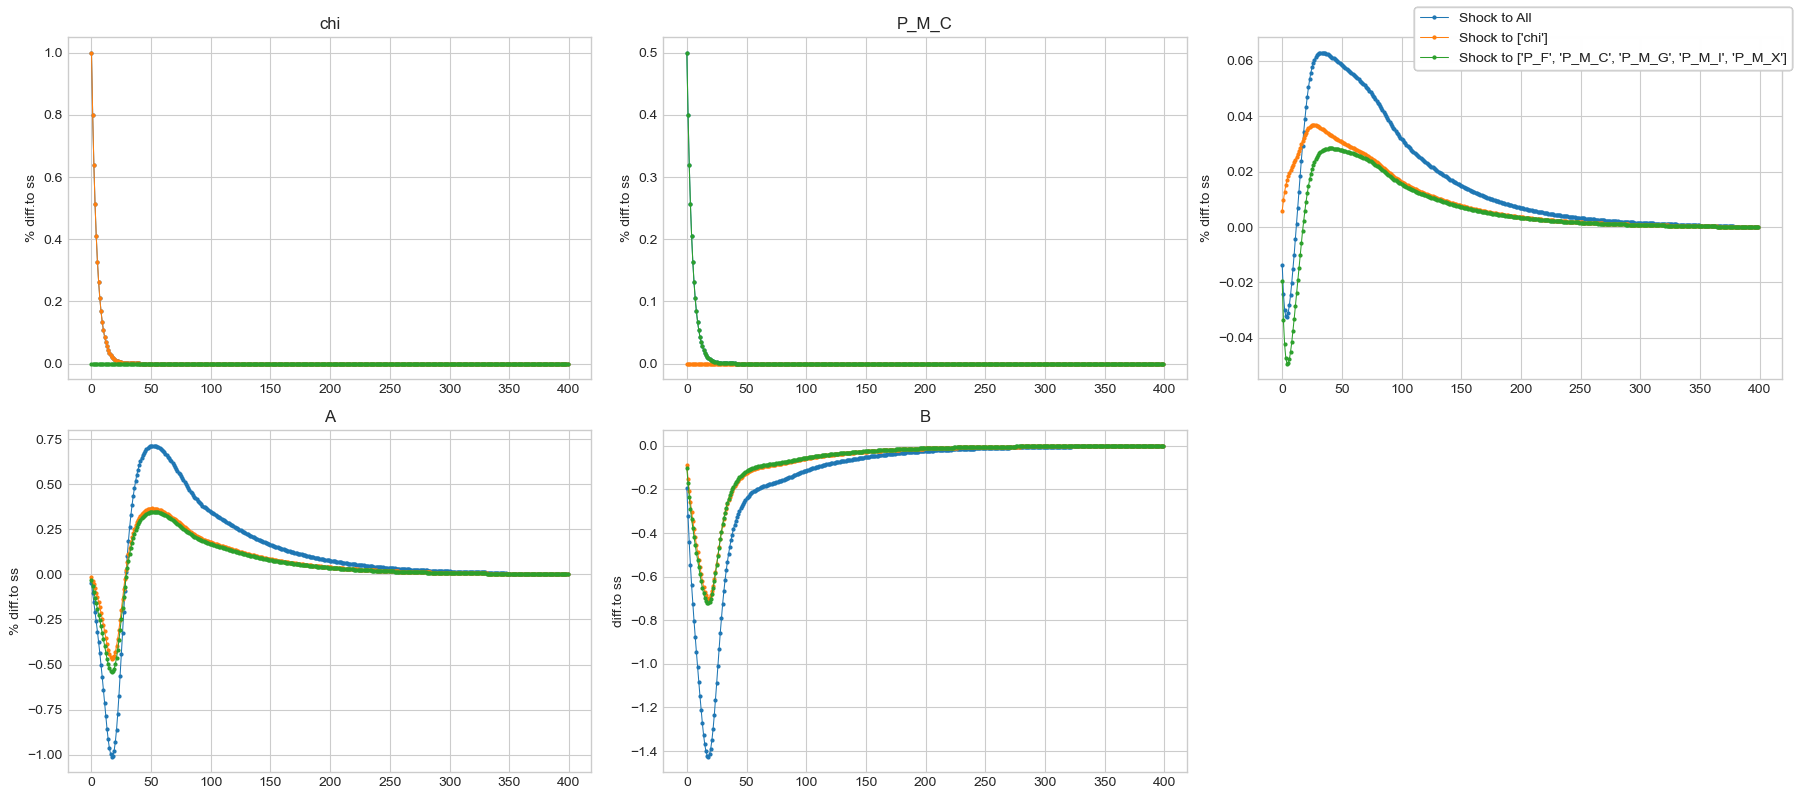

In [5]:
model.plot_IRF(varlist=['chi','P_M_C','K','A','B'],ncol=3,T_IRF=par.T)

### National accouting - quantities

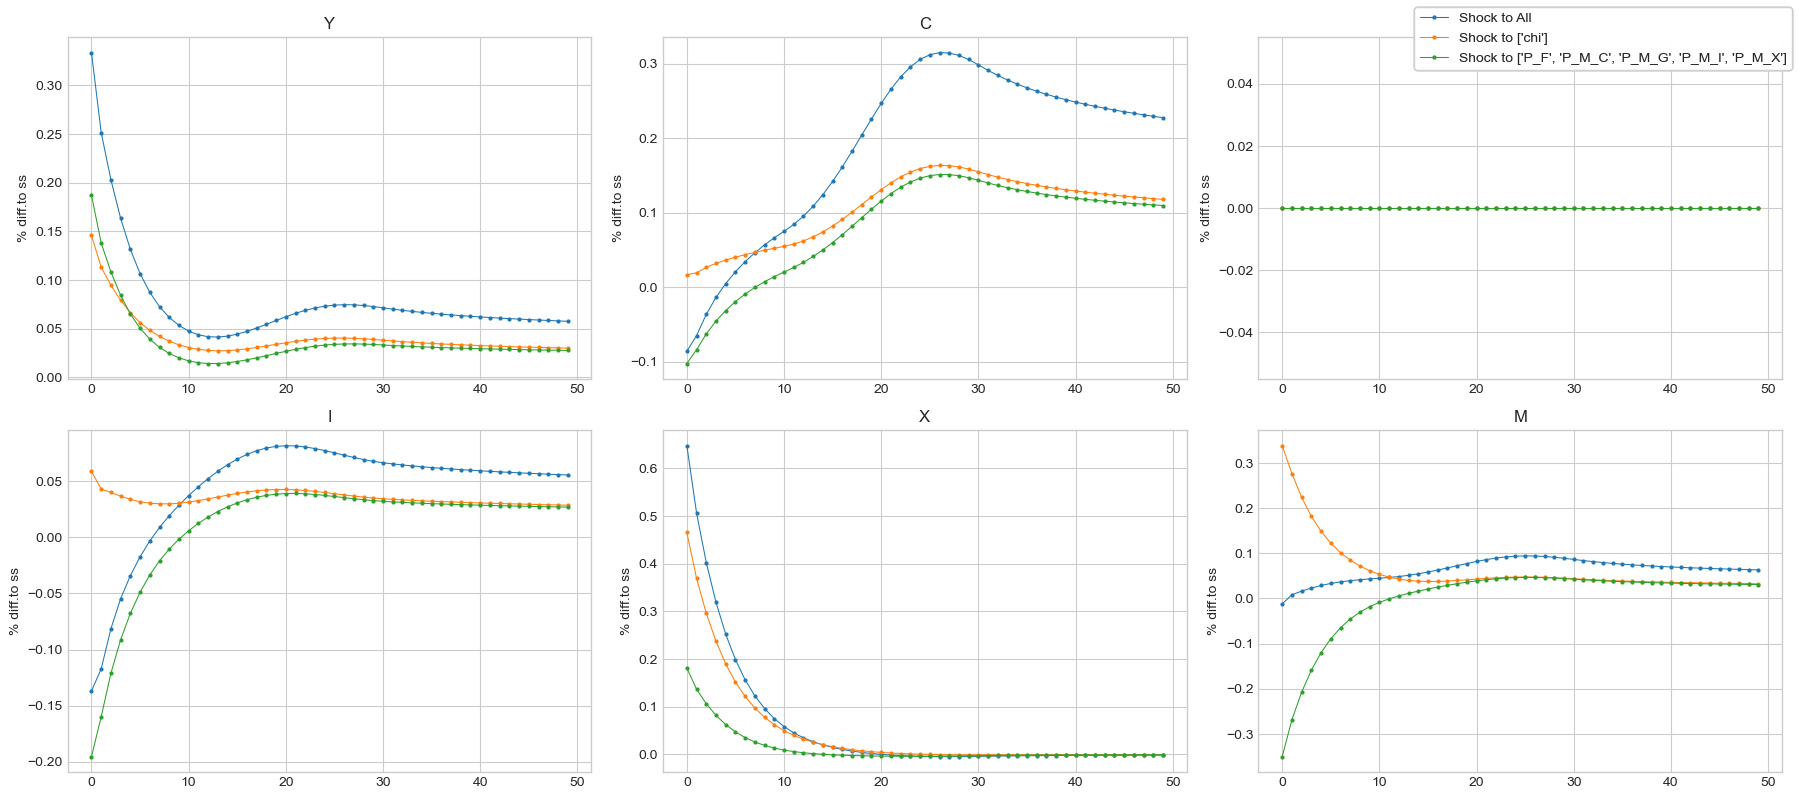

In [6]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'])

### National accouting - prices

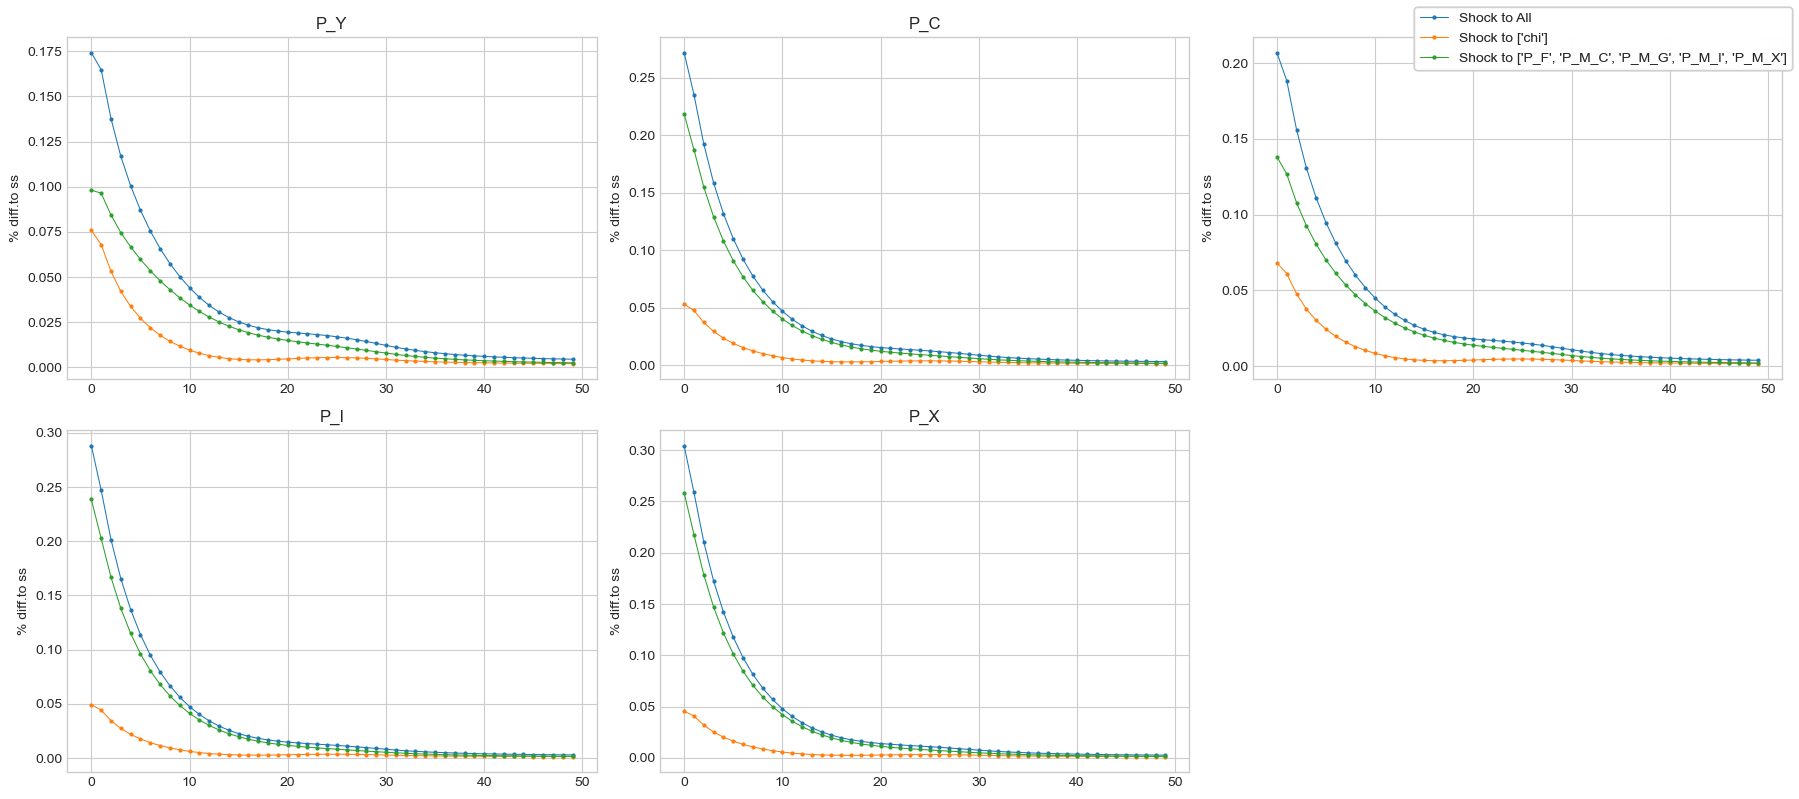

In [7]:
model.plot_IRF(varlist=['P_Y','P_C','P_G','P_I','P_X'])

### Import Prices

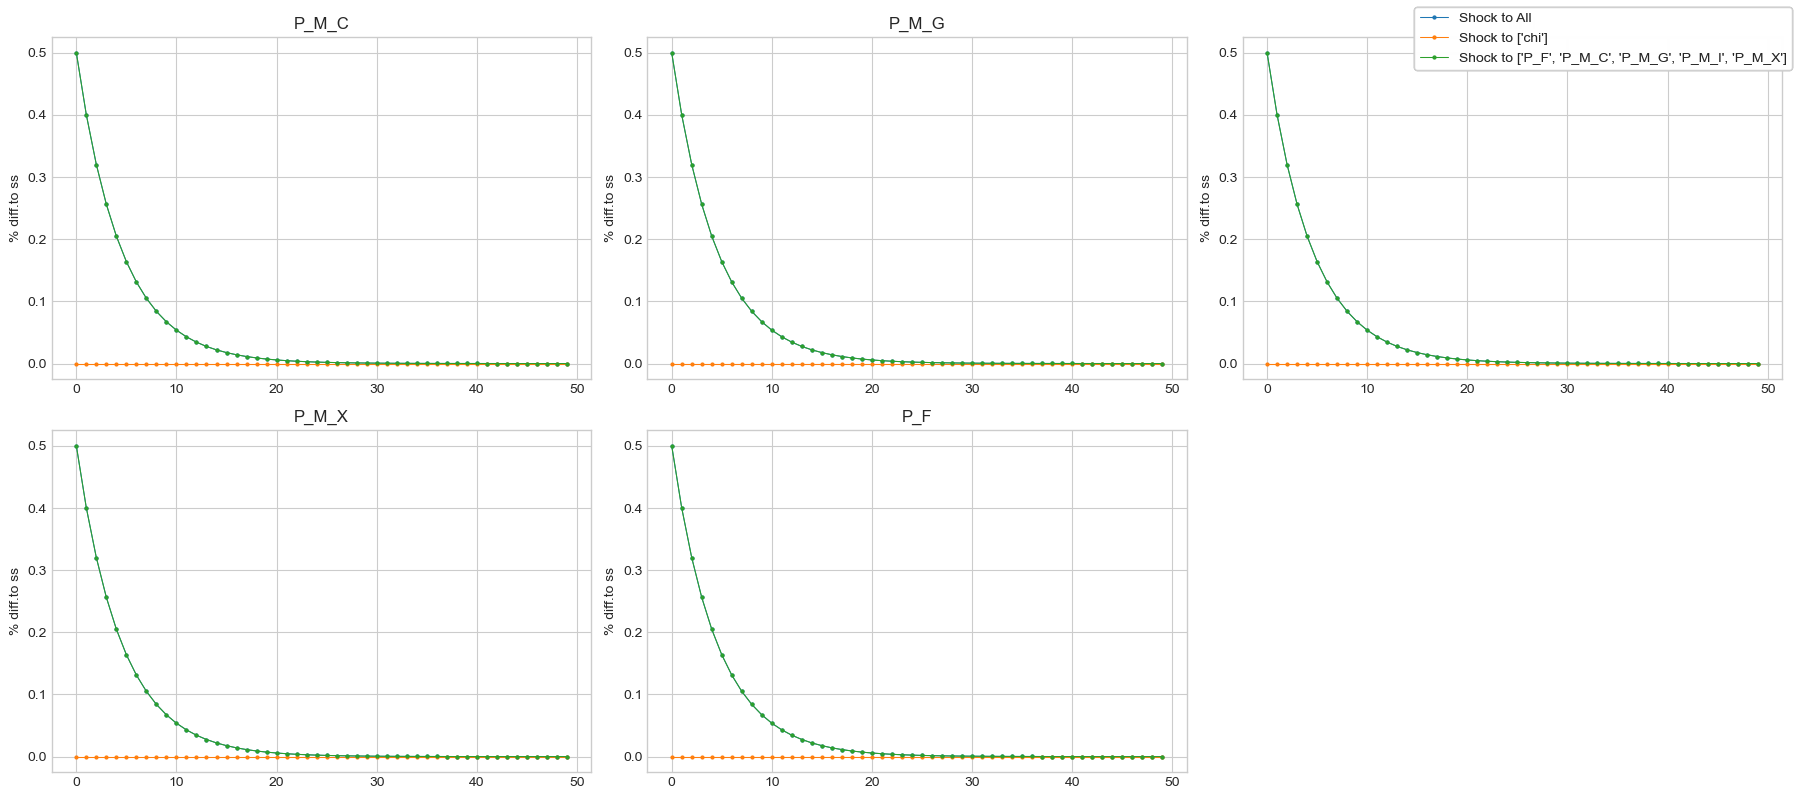

In [8]:
model.plot_IRF(varlist=['P_M_C','P_M_G','P_M_I','P_M_X','P_F'])

### Labor market

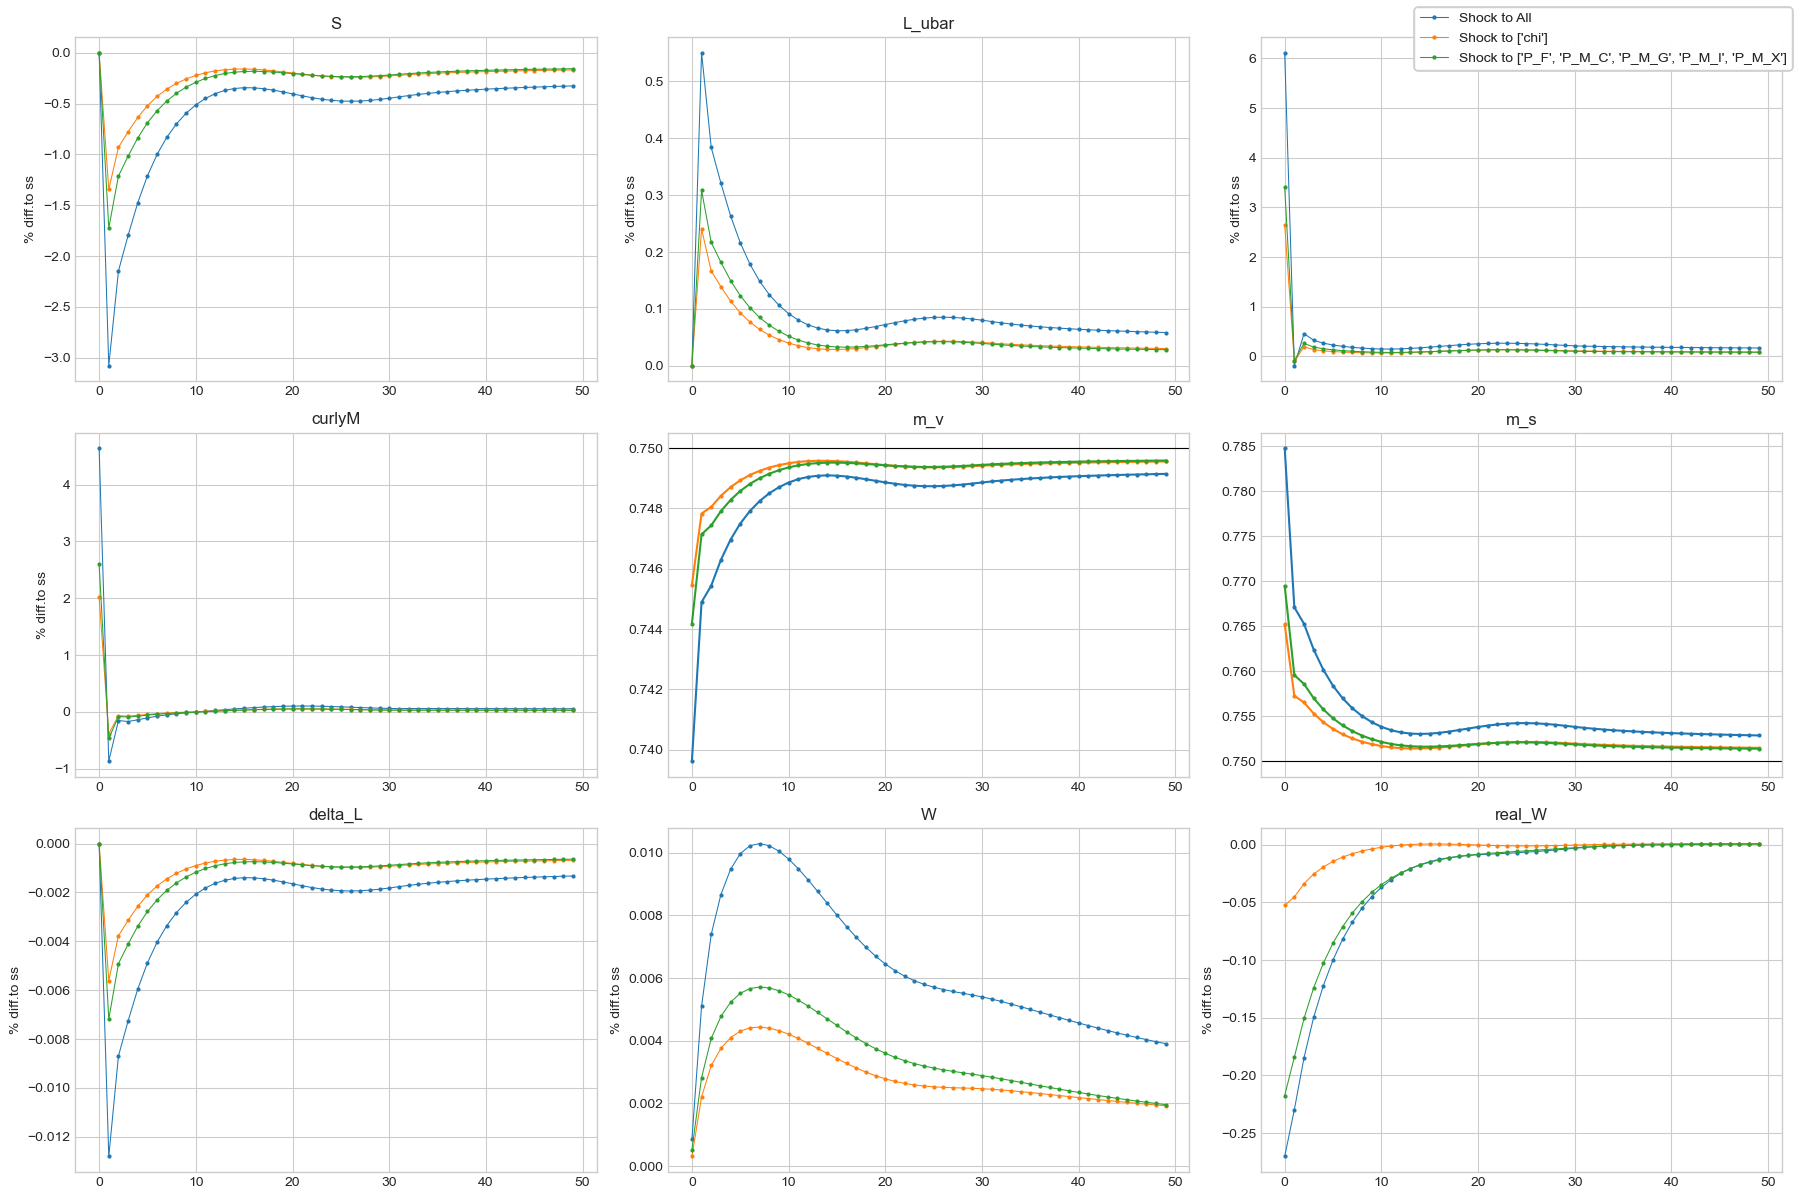

In [9]:
model.plot_IRF(varlist=['S','L_ubar','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### Capital accumulation

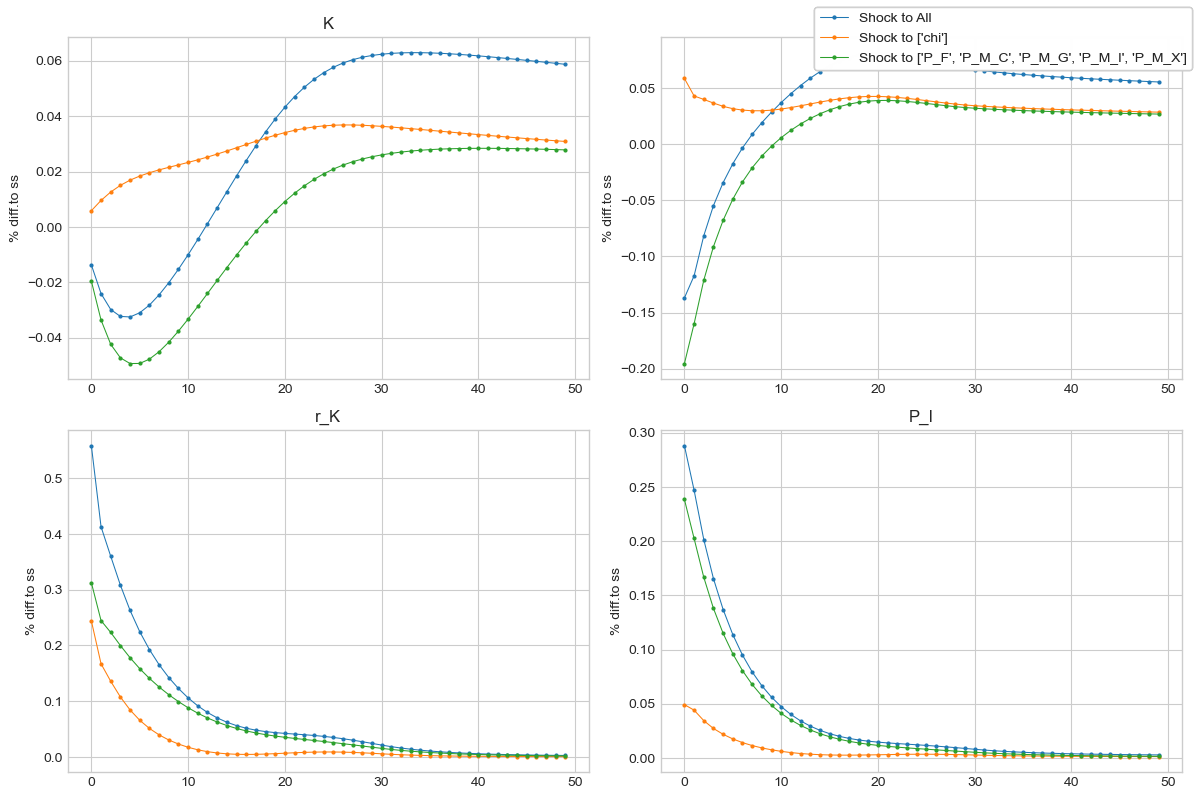

In [10]:
model.plot_IRF(varlist=['K','I','r_K','P_I'],ncol=2)

### Production firms

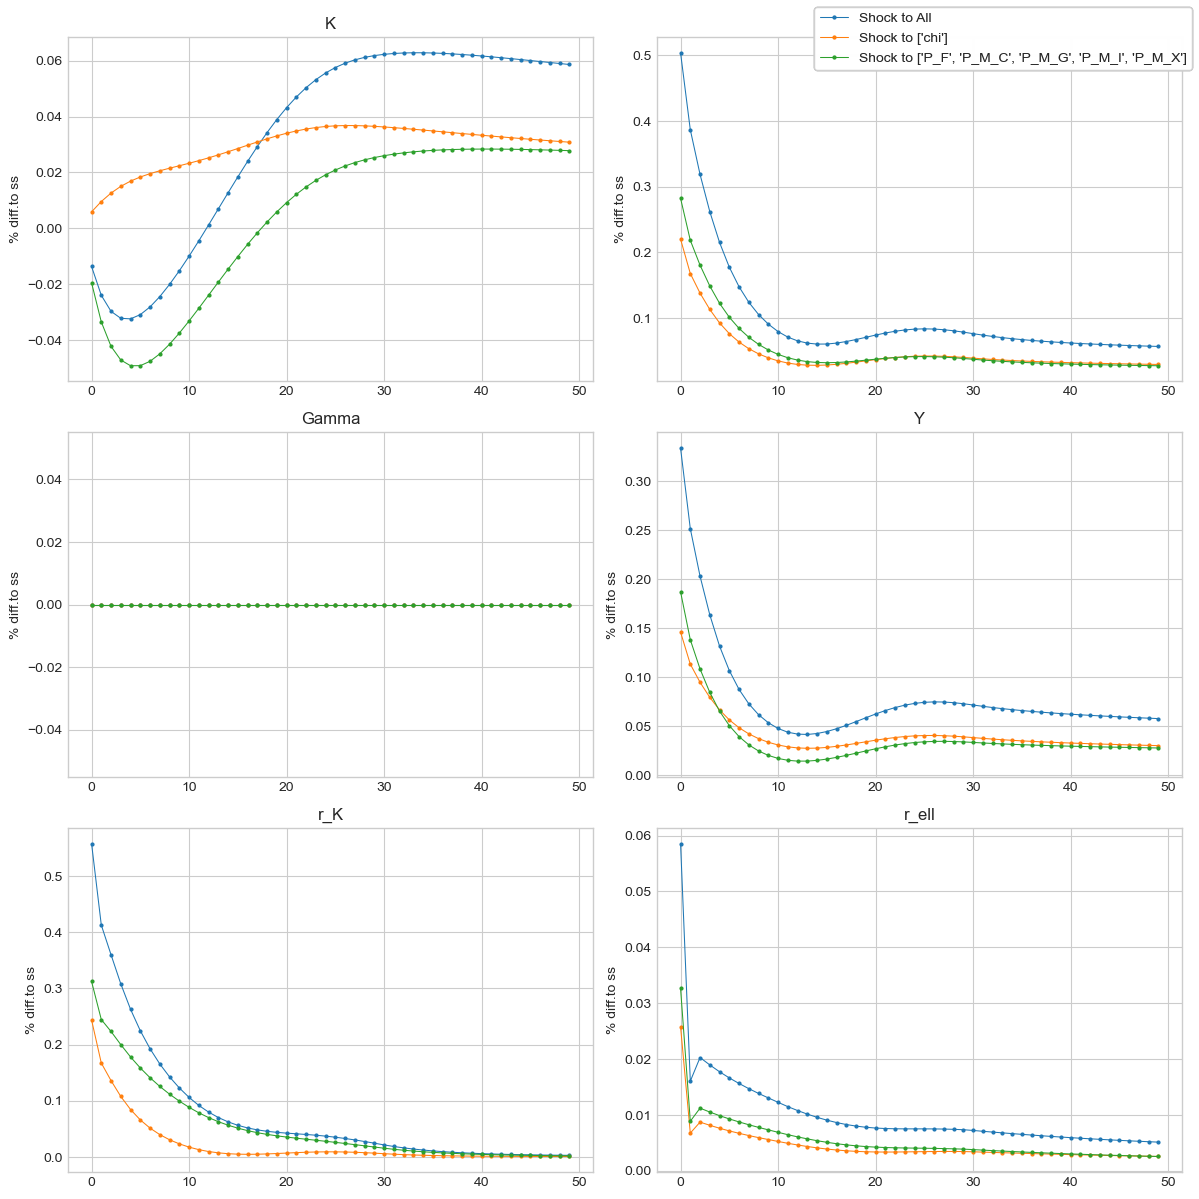

In [11]:
model.plot_IRF(varlist=['K','ell','Gamma','Y','r_K','r_ell'],ncol=2)

### Phillips curve

In [12]:
model.plot_IRF(varlist=['Y','P_Y_0','P_Y'],ncol=2)

TypeError: multi_shock_IRF() got an unexpected keyword argument 'arlist'

### Government

In [ ]:
model.plot_IRF(varlist=['G','B','tau'],abs=['tau'],Y_share=['B'])

### Households - aggregate

In [ ]:
model.plot_IRF(varlist=['L','U','inc','W','real_W','real_r_hh','C','A','Aq'],ncol=3,abs=['real_r_hh'])

In [ ]:
model.plot_IRF(varlist=['C_HtM','C_R'],ncol=2)

### Households - life-cycle

In [ ]:
model.plot_IRF_hh(varlist=['L_a','L_ubar_a','S_a','inc_a','C_a','A_a'],t0_list=[-20,-10,0,10,20])